# Matchmaker

## Meet people you have something in common with.
e.g. you both like coffee


Here is the data:
    userId      Hobbies          Job title Home country       Goal 1       Goal 2     Industry
0        1     pingpong          President      Germany      network  hire people     software
1        2  3d printing  software engineer      Finland  new friends      network  agriculture
2        3     pingpong    product manager          USA    get a job      network           IT
3        4  3d printing  software engineer      Finland  new friends      network     software
4        5      boating    product manager          USA    get a job  new friends     software
5        6     pingpong          President       France      network  hire people     software
6        7     pingpong  software engineer       Sweden  new friends      network  agriculture
7        8     pingpong        Director IT       Canada    get a job      network           IT
8        9      fishing  software engineer       Canada  new friends      network     software
9       10     pingpong    produ

c:\Users\Allan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


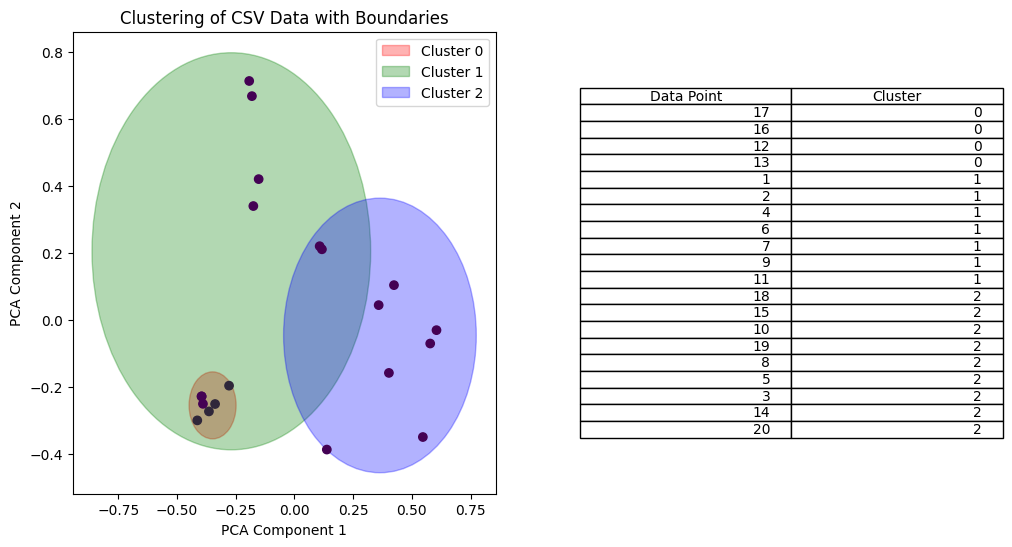

PCA Component 1:
10             0.079631
11            -0.074038
12            -0.070222
13            -0.093476
14             0.020033
15             0.020179
16            -0.053680
17            -0.059765
18             0.111612
19             0.086074
20             0.078901
3d            -0.062004
aerospace      0.035346
agriculture   -0.060093
boating        0.045108
buy            0.020033
canada        -0.158861
director       0.022259
engineer      -0.103237
estate        -0.059765
finland       -0.062004
fishing       -0.038916
france        -0.080514
friends        0.142247
germany       -0.080514
get            0.304443
hire          -0.186448
hr            -0.074038
it             0.142742
job            0.304443
manager        0.372978
network       -0.104495
new            0.142247
people        -0.186448
pilot          0.035346
pingpong      -0.057088
president     -0.141546
printing      -0.062004
product        0.372978
real          -0.059765
running       -0.059765

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.patches import Circle

# Read the CSV file
data = pd.read_csv('match_data.csv')

# Show up to 10 columns in the dataframe and 1000px wide
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

# Print the data
print("Here is the data:")
print(data)


# Concatenate all column values into a single text column
data['Combined'] = data.apply(lambda row: ' '.join([str(row[col]) for col in data.columns]), axis=1)

# Perform TF-IDF vectorization on the combined text
vectorizer = TfidfVectorizer()
text_matrix = vectorizer.fit_transform(data['Combined'])

# Apply dimensionality reduction using PCA with more components (e.g., n_components=3)
pca = PCA(n_components=3)
text_pca = pca.fit_transform(text_matrix.toarray())

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(text_pca)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Define colors for each cluster
cluster_colors = ['red', 'green', 'blue']

# Visualize the clusters and draw boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for cluster_label in set(labels):
    cluster_points = text_pca[labels == cluster_label]
    centroid = centroids[cluster_label]
    radius = max(((cluster_points - centroid) ** 2).sum(axis=1)) ** 0.5
    circle = Circle(centroid[:2], radius, alpha=0.3, label=f"Cluster {cluster_label}", color=cluster_colors[cluster_label])
    ax1.add_patch(circle)
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], c=labels[labels == cluster_label], cmap='viridis')

ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Clustering of CSV Data with Boundaries')

# Add legend
ax1.legend()

# Assign cluster labels to the data
data['Cluster'] = labels

# Sort data table by cluster label
sorted_data = data.sort_values(by='Cluster')

# Add the table with cluster assignments using userId
table_data = {'Data Point': sorted_data['userId'], 'Cluster': sorted_data['Cluster']}
ax2.axis('off')
ax2.table(cellText=pd.DataFrame(table_data).values, colLabels=pd.DataFrame(table_data).columns, loc='center')

plt.show()


# Get the interpretation of PCA Component 1 and PCA Component 2
pca_components = pd.DataFrame(pca.components_, columns=vectorizer.get_feature_names_out(), index=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])

# Print the values and interpretation of PCA Component 1
component_1 = pca_components.loc['PCA Component 1']
print("PCA Component 1:")
print(component_1)
print()

# Print the values and interpretation of PCA Component 2
component_2 = pca_components.loc['PCA Component 2']
print("PCA Component 2:")
print(component_2)
print()

# Print the values and interpretation of PCA Component 2
component_3 = pca_components.loc['PCA Component 3']
print("PCA Component 3:")
print(component_3)
print()